In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [4]:
sqlalchemy.__version__

'1.4.32'

In [5]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [7]:
# Reflect an existing database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
connection=engine.connect()
session=Session(bind=connection)
# inspector=sqlalchemy.inspect(connection)
# inspector.get_table_names()

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.

In [13]:
# Print column names within 'Measurement' table
columns_measurement = inspector.get_columns('Measurement')
for column in columns_measurement:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Query & print most recent date
result_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(result_date)

('2017-08-23',)


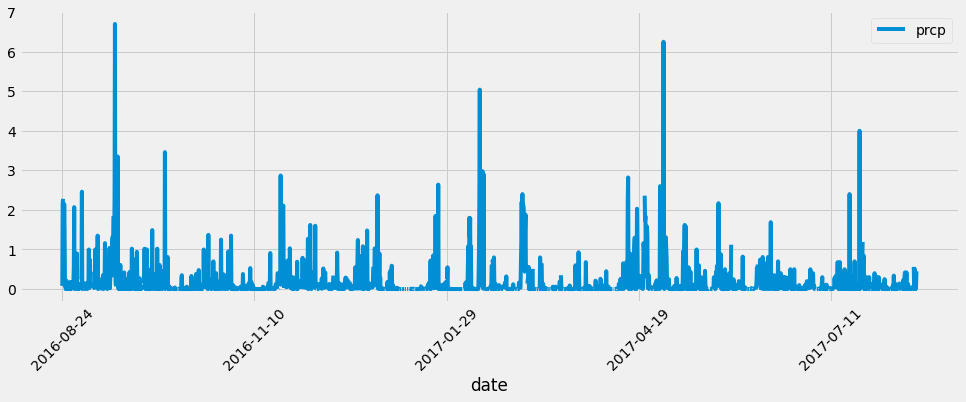

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Perform a query to retrieve the data, precipitation scores and sort by date
result_year=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_prcp=pd.DataFrame(result_year)
df_prcp=df_prcp.set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
df_prcp.plot(subplots=True, rot=45, figsize=(15, 5))
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
result_station=session.query(Measurement.station).count()
print(result_station)

19550


In [30]:
# Design a query to list all the stations in the dataset
result_list=session.query(Measurement.station).distinct().order_by(Measurement.station).all()
print(result_list)

[('USC00511918',), ('USC00513117',), ('USC00514830',), ('USC00516128',), ('USC00517948',), ('USC00518838',), ('USC00519281',), ('USC00519397',), ('USC00519523',)]


In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
result_active=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
print(result_active)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result_min=session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').scalar()
result_max=session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').scalar()
result_avg=session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').scalar()
print(f'Lowest temp: {result_min}; Highest temp: {result_max}, Average temp: {result_avg}')

Lowest temp: 54.0; Highest temp: 85.0, Average temp: 71.66378066378067


array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

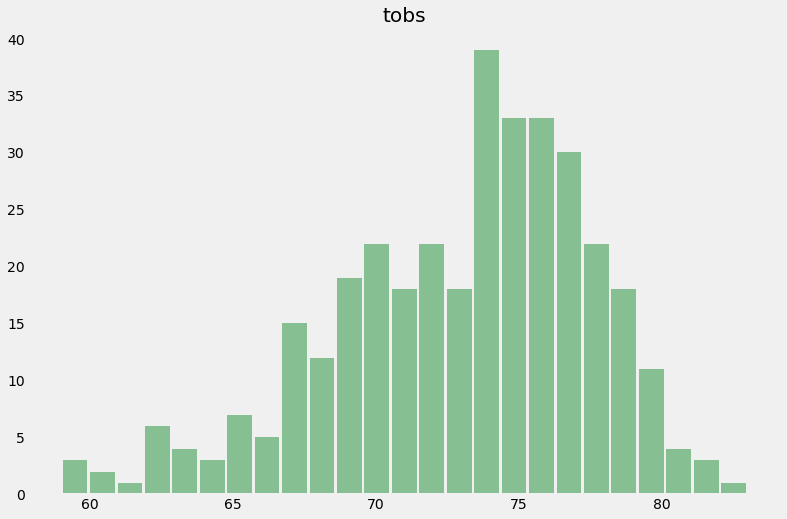

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result_temp=session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23', Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()

df_temp=pd.DataFrame(result_temp)
df_temp=df_temp.set_index('date')

df_temp.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

# Close session

In [23]:
# Close Session
session.close()